# Download Antarctic datasets
The module `antarctic_plots.fetch` provides an easy way to download, pre-process and store common datasets related to Antarctica. More datasets will be added, so check the changelogs for new datasets or submit a issue on github to request adding new datasets.

All the functions in the `antarctic_plots.fetch` module use the python package Pooch to download and store the data. Several of the functions include pre-processing to grid and reproject the data to Polar Stereographic. The first call to a function will download and preprocess the data, which may take some time, but subsequent calls to the same function will just fetch the already processed and downloaded data. These datasets will be stored by default in your following local file:
* Mac: `~/Library/Caches/pooch`
* Unix: `~/.cache/pooch` or the value of the XDG_CACHE_HOME environment variable, if defined.
* Windows: `C:\Users\<user>\AppData\Local\pooch\pooch\Cache`

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
from antarctic_plots import fetch, regions, maps, utils
import pyogrio

Here is a list of all the currently available datasets to fetch:

In [2]:
from inspect import getmembers, isfunction

fetch_functions = [i[0] for i in getmembers(fetch, isfunction)]

remove = ["resample_grid", "sample_shp"]

fetch_functions = [x for x in fetch_functions if x not in remove]
fetch_functions

['IBCSO',
 'IBCSO_coverage',
 'REMA',
 'ROSETTA_gravity',
 'basement',
 'bedmachine',
 'bedmap2',
 'bedmap_points',
 'crustal_thickness',
 'deepbedmap',
 'etopo',
 'geoid',
 'ghf',
 'gia',
 'gravity',
 'groundingline',
 'ice_vel',
 'imagery',
 'magnetics',
 'modis_moa',
 'moho',
 'sediment_thickness']

Download and plot BedMap thickness data, the default will return a grid of the full antarctic region, at 1km resolution. Print out some info with `info=True` and plot the results with `plot=True`.


returning original grid
: Title: 
: Command: 
: Remark: 
: Gridline node registration used [Cartesian grid]
: Grid file format: nf = GMT netCDF format (32-bit float), CF-1.7
: x_min: -3333000 x_max: 3333000 x_inc: 1000 name: x n_columns: 6667
: y_min: -3333000 y_max: 3333000 y_inc: 1000 name: y n_rows: 6667
: v_min: 0 v_max: 4621 name: z
: scale_factor: 1 add_offset: 0
: format: classic
: Default CPT: 



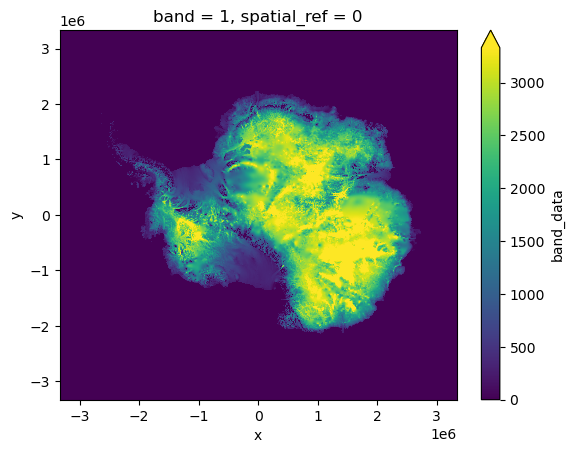

In [9]:
grid = fetch.bedmap2(
    layer="thickness",
    plot=True,
    info=True,
)

Resample the grid by provide 1 or all of the following:
* region: give a subset region. See the modeule antarctic_plots.regions for examples.
* spacing: supply a new grid spacing in meters.
* registration: choose between 'p' for pixel and 'g' for gridline

spacing larger than original, filtering and resampling


grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


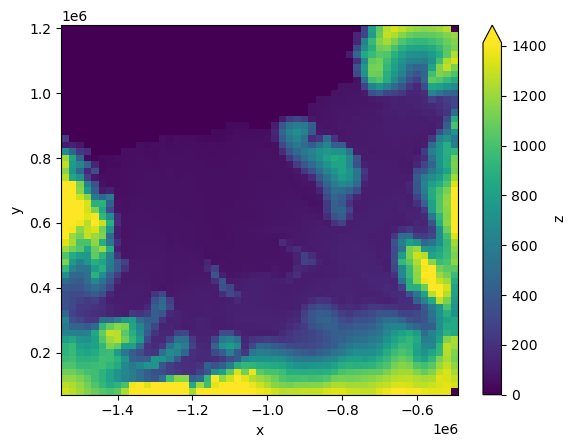

In [13]:
grid = fetch.bedmap2(
    layer="surface",
    region=regions.ronne_filchner_ice_shelf,
    spacing=20e3,  # 20km
    registration="g",
    plot=True,
)

Apply common corrections, such as calculating the ice base (surface - thickness) and converting the grid elevation from a geoid to an ellipsoid reference

In [14]:
grid = fetch.bedmap2(
    layer="icebase",
    reference="ellipsoid",
    plot=True,
)

returning original grid
returning original grid
returning original grid


`Fetch` also allows for downloading datasets from [NSIDC](https://nsidc.org/home), which requires an [Earthdata login](https://urs.earthdata.nasa.gov/home). Calling `fetch` on one of these datasets will either 
1) look for a username and password which have been set in your environment variables as `EARTHDATA_USERNAME` and `EARTHDATA_PASSWORD` or
2) prompts to enter your username and password will appear. 

Note: you may need to restart your computer for new environment variables to be registered.

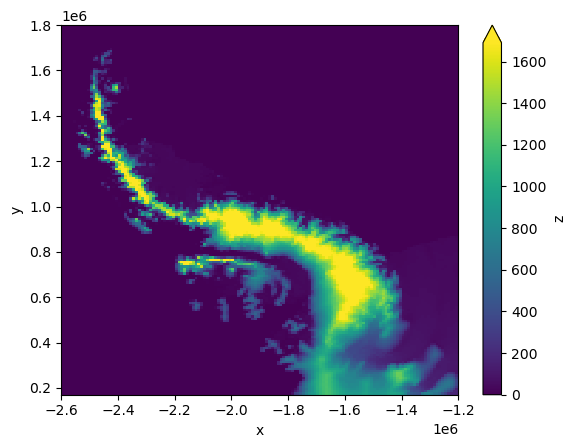

In [7]:
grid = fetch.bedmachine(
    layer="surface",
    plot=True,
    region=regions.antarctic_peninsula,
)

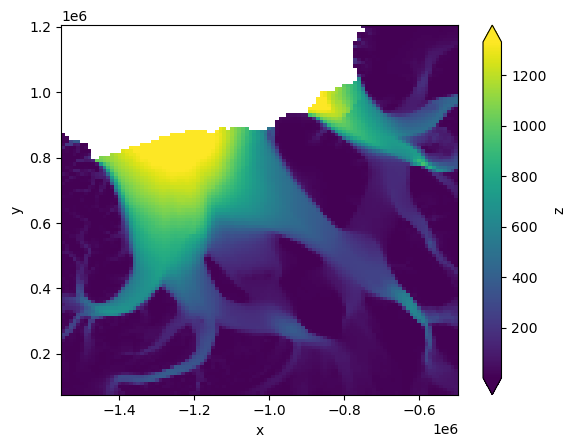

In [8]:
grid = fetch.ice_vel(
    region=regions.ronne_filchner_ice_shelf,
    plot=True,
)

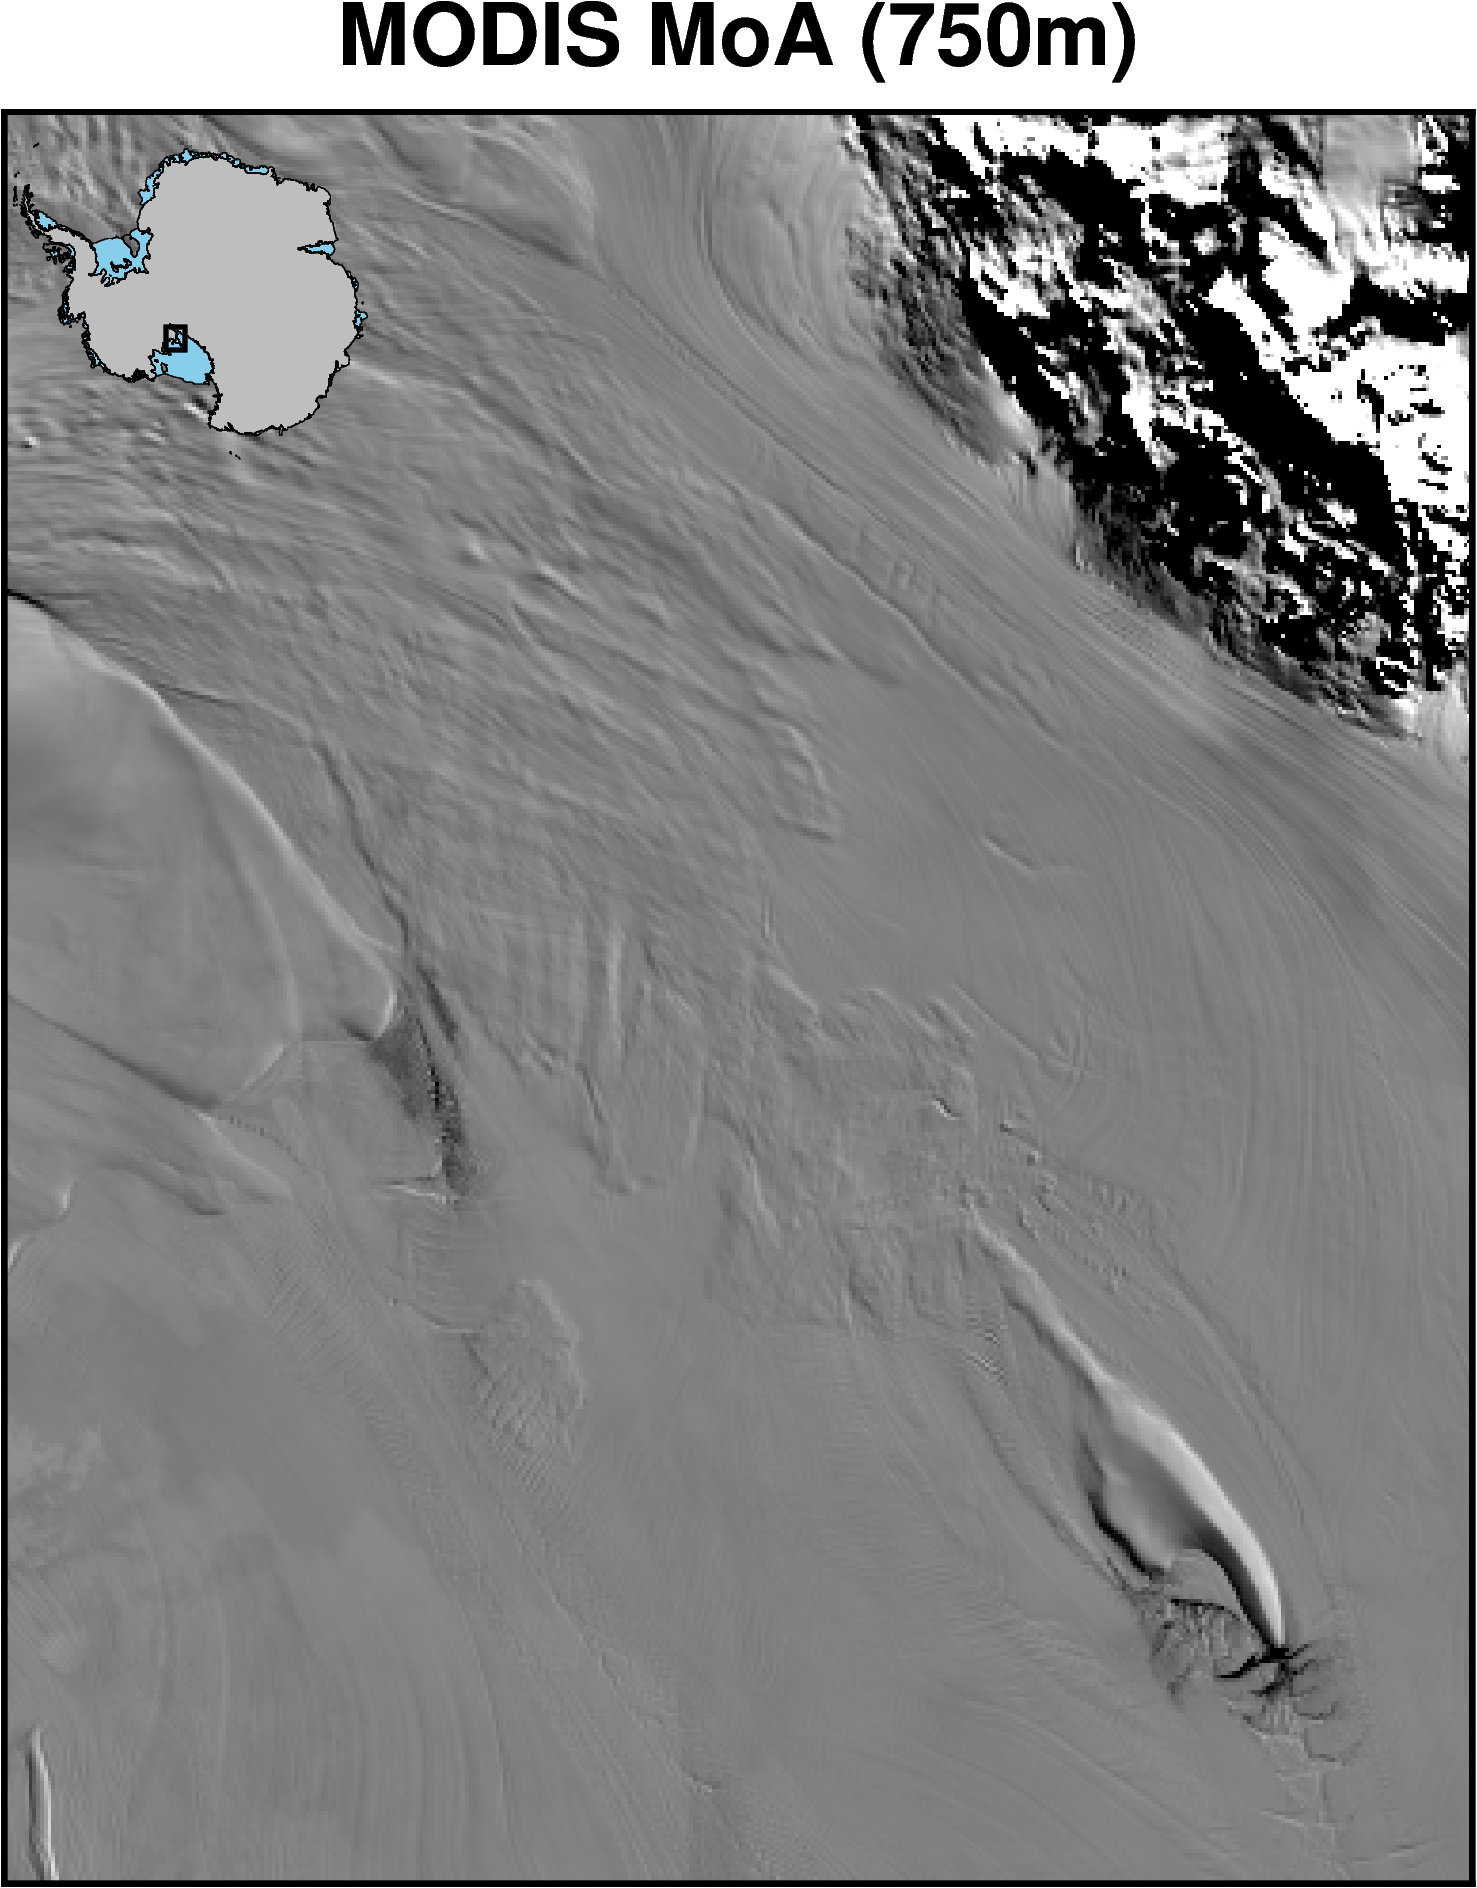

In [9]:
moa = fetch.modis_moa(version=750)

fig = maps.plot_grd(
    moa,
    cmap="gray",
    image=True,
    region=regions.crary_ice_rise,
    title="MODIS MoA (750m)",
    inset=True,
)

fig.show()

Get the groundingline and coastline data and visualize the classifications

In [10]:
# load the grounding and coast line database
shp = pyogrio.read_dataframe(fetch.groundingline())

# see the options for subsetting
shp.Id_text.unique()

array(['Ice shelf', 'Isolated island', 'Ice rise or connected island',
       'Grounded ice or land'], dtype=object)

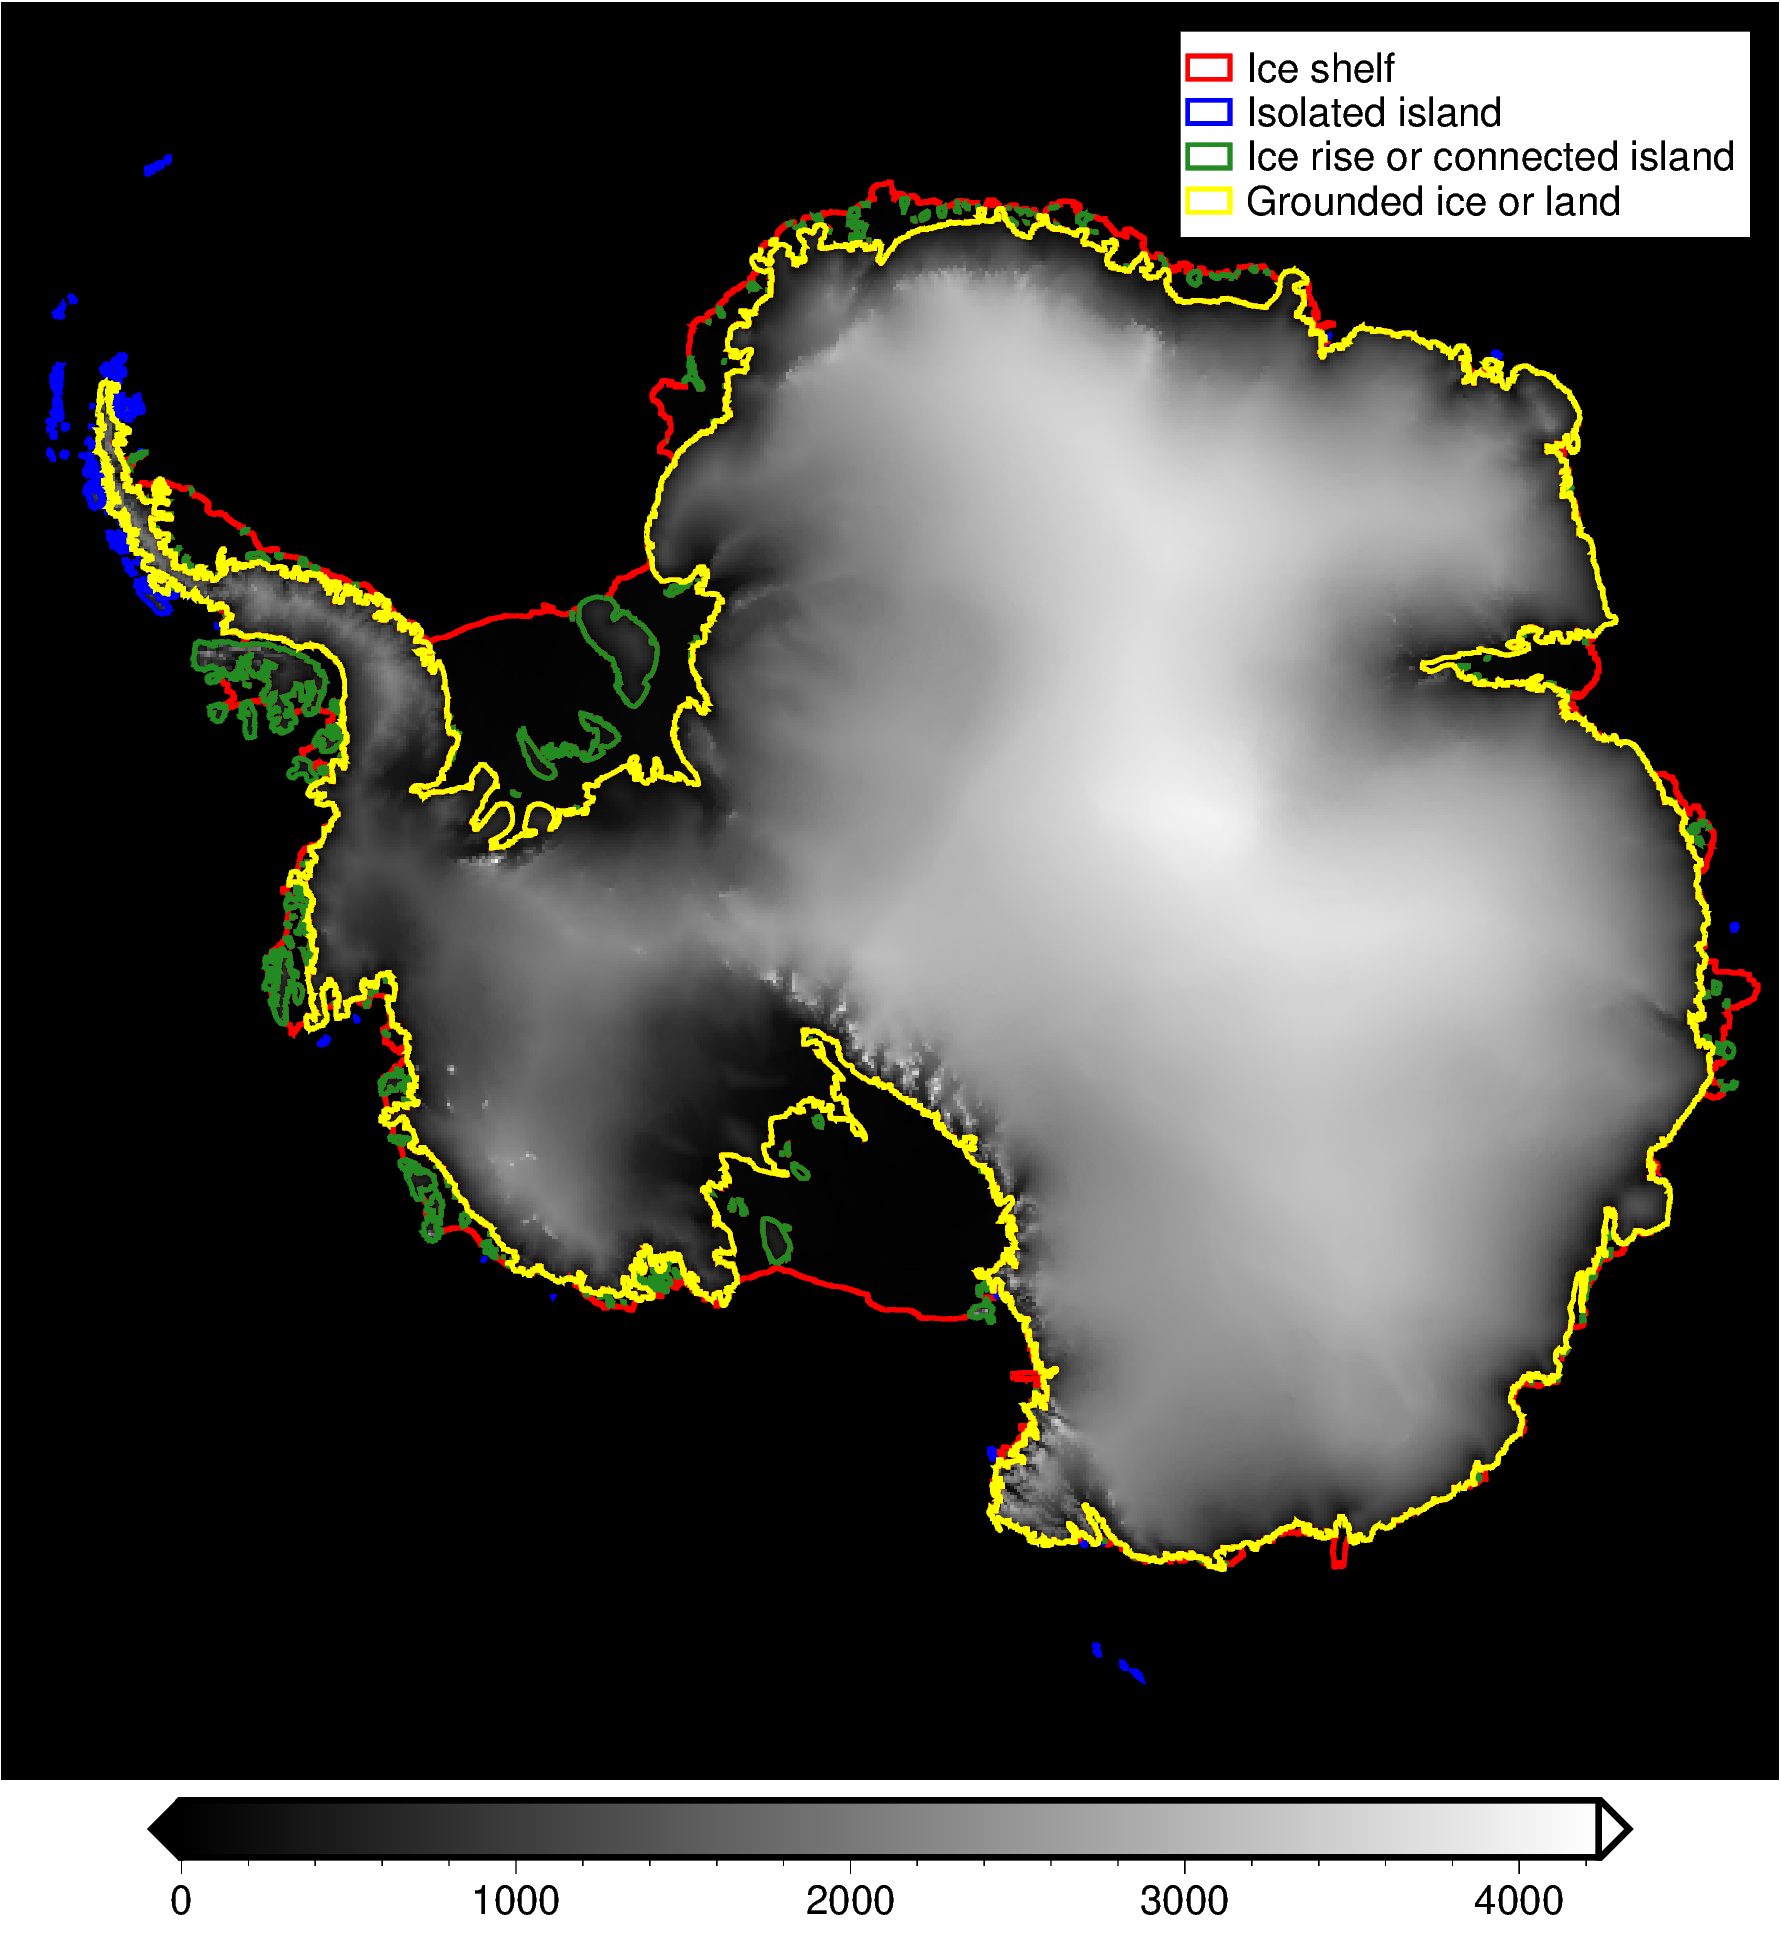

In [11]:
# plot a quick basemap
fig = maps.plot_grd(fetch.bedmachine(layer="surface"), cmap="gray")

# add the classifications of grounding/coast line types to the map
colors = ["red", "blue", "forestgreen", "yellow"]
for i, j in enumerate(shp.Id_text.unique()):
    fig.plot(
        shp[shp.Id_text == j],
        pen=f"1p,{colors[i]}",
        label=j,
    )

fig.legend()
fig.show()